# Classifying Images Using Keras and TensorFlow

## Introduction

While I currently have a handwritten digits classification project elsewhere on my portfolio, knowing how to implement Neural Networks using TensorFlow and Keras is a deep learning technique that any Data Scientist or Machine Learning Engineer should be comfortable with.

The images we will try to classify in this project will be items of clothing from lists of assorted clothing items. Techniques used to make predictions will be spelt out in the comments below.

### Preprocessing

In [1]:
# We first install our necessary packages
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We then proceed to load in our dataset of items of clothing images
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# First, let's split our dataset into the standard train/test pair to inspect the elements
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# Impressive, we have over 60000 training examples. The images are represented by a 28x28 array as well. 
X_train_full.dtype

dtype('uint8')

In [5]:
# We now will split our data again to create a holdout validation set. We'll also scale the data down by dividing each feature 
# by 255 since we will be using GDA. We choose 255 since pixel intensity is determined by integers in range(0, 255)
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  # We don't divide this by 255 as these are only labels 0-9
X_test = X_test / 255.

### Labeling our data

Due to the fact that our target variables are numbers, we need a way to label these numbers based upon the images they represent. The following section will label the data of our target columns. 

In [6]:
# First, let's see how many items of cloting are represented in this dataset. 
pd.Series(y_train).value_counts()

0    5543
4    5512
8    5510
6    5507
5    5507
3    5499
2    5496
9    5494
7    5488
1    5444
dtype: int64

We have a relatively uniform distribution of 10 different items of clothing. Let's plot some pictures to be able to see what each category represents in terms of articles of clothing.

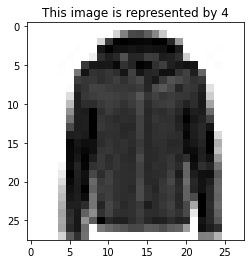

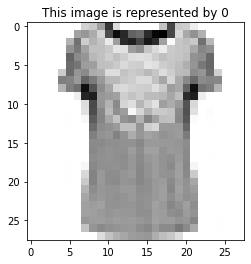

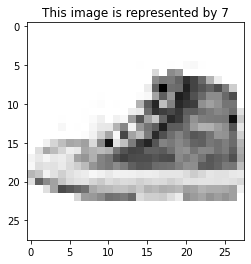

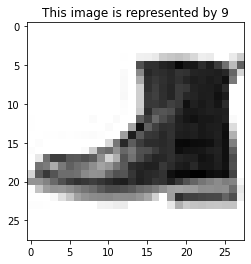

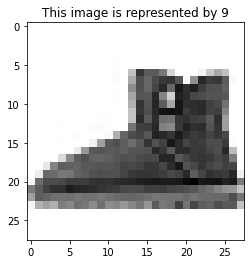

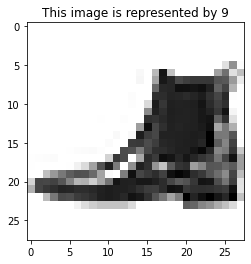

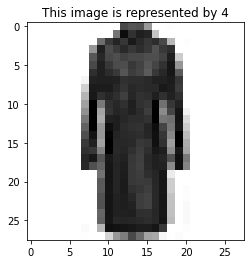

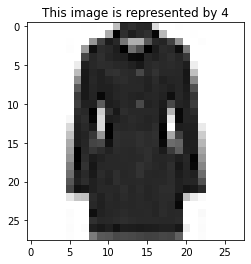

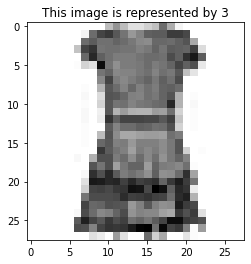

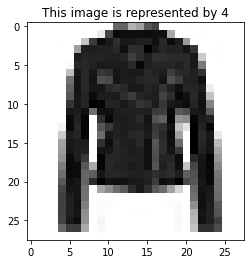

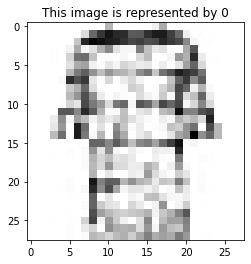

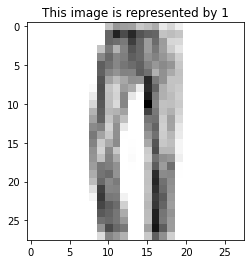

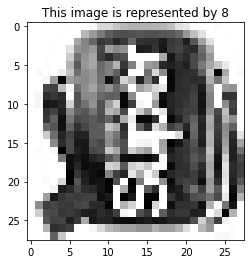

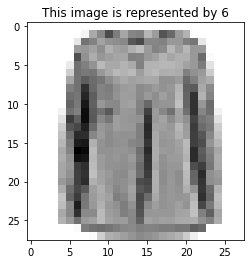

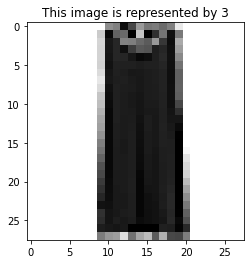

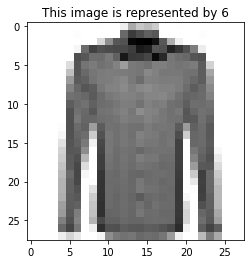

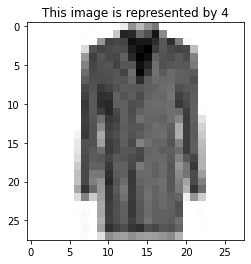

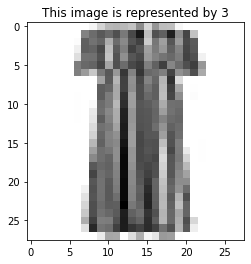

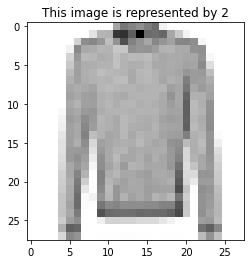

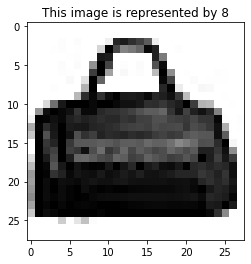

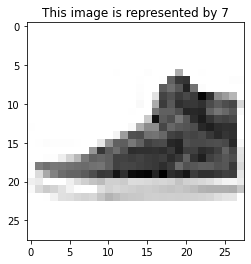

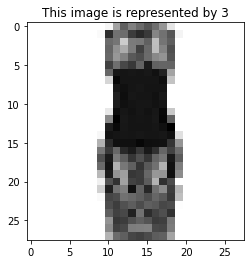

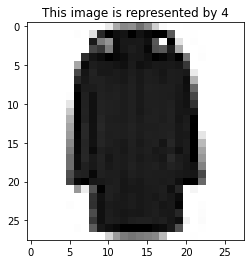

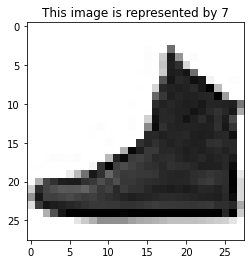

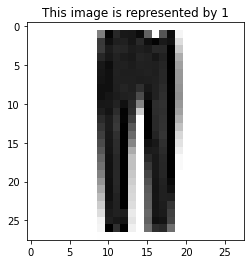

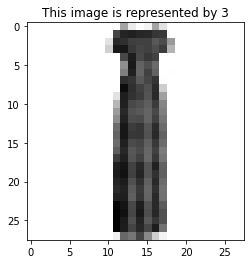

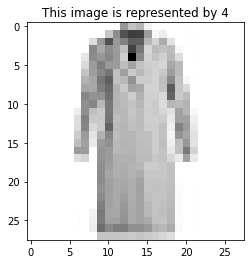

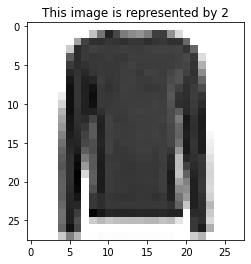

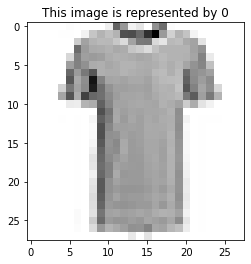

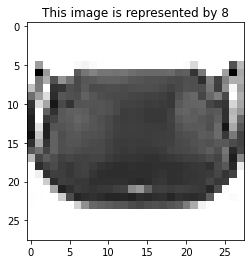

In [7]:
for i in range(30):
    %matplotlib inline
    image = X_train[i].reshape(28, 28)
    plt.imshow(image, cmap='gray_r')
    label = y_train[i]
    plt.title(f"This image is represented by {str(label)}")
    plt.show()

In [8]:
# Now that we have each output variable number, let's create a list where the index is the correct item of clothing. 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Let's check to make sure that our list is correct
class_names[y_train[0]]

'Coat'

### Model Construction

Now it's time to get into the juicy part. Since this is a preloaded data set, not much cleaning is needed for this data set. As a result, we can skip to the model construction set. We will create the model first, then explain what each line of code is doing. 

In [10]:
# Refer to the comment block below for an explanation
model = keras.models.Sequential()  #1
model.add(keras.layers.Flatten(input_shape=[28,28]))  #2
model.add(keras.layers.Dense(300, activation="relu"))  #3
model.add(keras.layers.Dense(100, activation="relu"))  #4
model.add(keras.layers.Dense(10, activation="softmax"))  #5

Let's break down the above code by each line:
   1. We create an instance of a Keras model, which is a single stack of layer connected sequentially.
   2. We then construct the first layer of our network. Its job is to convert each image to a 1D array. Recall that this would be considered the "input layer" of our model. It does not assign any weights, but rather performs some simple preprocessing.
   3. We then create our first hidden layer of 300 neurons that utilizes the Rectivied Linear Unit activation function. A Dense layer is a layer that manages its own weights matrix. This matrix contains all the connection weights between neurons and their inputs.
   4. We then add a second hidden layer of 100 neurons, also leveraging the ReLU activation function.
   5. Lastly, we end with our output layer of 10 neurons (one per class) using the softmax activation function (due to the fact that our classes are exclusive

In [11]:
# Let's try to understand the structure of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Let's take a look at our model's weights. (That's a lot of parameters)
weights, biases = model.layers[1].get_weights()

In [13]:
weights  # Our initial weights before training were randomly initialized

array([[ 0.06438535, -0.02222078,  0.0736866 , ...,  0.04683679,
        -0.03578415, -0.05394085],
       [ 0.02739134,  0.04051546, -0.05487201, ..., -0.0565906 ,
         0.0275441 ,  0.02773903],
       [-0.02583266, -0.02350157, -0.0673902 , ...,  0.01452494,
        -0.02329395,  0.07254758],
       ...,
       [-0.07176464, -0.0093904 ,  0.04440831, ...,  0.02783702,
         0.0190822 ,  0.05535124],
       [-0.02705152,  0.06968769,  0.04661141, ..., -0.00635744,
        -0.02184174, -0.0634791 ],
       [ 0.07080899,  0.03223679,  0.00963825, ..., -0.06935171,
         0.02116709, -0.06826821]], dtype=float32)

In [14]:
biases # Our bias are initialized to zero

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
# We now are ready to compile our model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This code deserves explanation. Let's go through each of these parameters:
1. The sparse categorical crossentropy specifies that our model is trying to classify different images
2. SGD is stochastic gradient descent. We chose this optimizer do perform backwards propagation
3. Lastly, our score metric is a simple accuracy score

### Model Training

We are finally ready to begin training our model on our dataset

In [16]:
history = model.fit(X_train, y_train, epochs=30, batch_size=1, validation_data=(X_valid, y_valid))  # I like the loading bars :)

Epoch 1/30
55000/55000 [==============================] - 36s 658us/step - loss: 0.5128 - accuracy: 0.8137 - val_loss: 0.3873 - val_accuracy: 0.8606
Epoch 2/30
55000/55000 [==============================] - 37s 681us/step - loss: 0.3976 - accuracy: 0.8534 - val_loss: 0.3663 - val_accuracy: 0.8672
Epoch 3/30
55000/55000 [==============================] - 36s 651us/step - loss: 0.3593 - accuracy: 0.8654 - val_loss: 0.3518 - val_accuracy: 0.8698
Epoch 4/30
55000/55000 [==============================] - 36s 651us/step - loss: 0.3329 - accuracy: 0.8759 - val_loss: 0.3281 - val_accuracy: 0.8782
Epoch 5/30
55000/55000 [==============================] - 36s 650us/step - loss: 0.3153 - accuracy: 0.8826 - val_loss: 0.3862 - val_accuracy: 0.8588
Epoch 6/30
55000/55000 [==============================] - 36s 653us/step - loss: 0.3047 - accuracy: 0.8860 - val_loss: 0.3217 - val_accuracy: 0.8846
Epoch 7/30
55000/55000 [==============================] - 36s 660us/step - loss: 0.2920 - accuracy: 0.8896

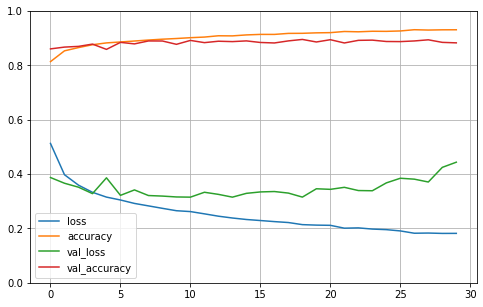

In [17]:
# Let's take a look at the performance of our model over time. 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Our model does not appear to be overfitting as the the validation and training set accuracy scores are very similar, namely aroudn 89%. That's good news!

### Generating Predictions

Now that we have fit our model to the training data, and verified that there is no risk to overfitting, we are ready to evaluate it on our test set. 

In [18]:
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 5s 472us/step - loss: 0.4704 - accuracy: 0.8758


[0.47043466567993164, 0.8758000135421753]

Our model scored rougly the same as our test set, which I would argue indicates that our model has a fairly good balance of bias and variance incorporated into this model. However, what if we wanted to productionalize our model? How good would it be in classifying a new image?

Unfortunately, we don't have any new images to apply. Let's just take a few instances of the test set

In [19]:
X_new = X_test[100:105]  # Completely arbitrary test examples
y_probability = model.predict(X_new)  # This will generate a probability matrix where each row is the piece of clothing and each column is the category that our model thinks it belongs to
y_probability.round(2)

1/1 [==============================] - 0s 102ms/step


array([[0.02, 0.  , 0.  , 0.94, 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
# Now we write code to see what our model classified each image as based upon the probability
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 13ms/step


array([3, 6, 7, 6, 7], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Dress', 'Shirt', 'Sneaker', 'Shirt', 'Sneaker'], dtype='<U11')

In [22]:
# Let's see if our model was correct!
y_new = y_test[100:105]
np.array(class_names)[y_new]

array(['Dress', 'Shirt', 'Sneaker', 'Pullover', 'Sneaker'], dtype='<U11')

Our model got 4/5 of the items correct. This is roughly what we would expect to based upon the accuracy of our model from before. Let's see why it might have miss characterize the Pullover as a shirt.

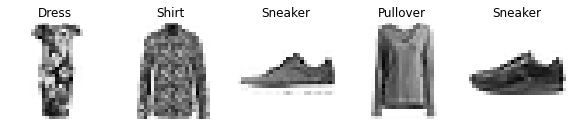

In [23]:
plt.figure(figsize=(10, 10))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index+1)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_new[index]], fontsize=12)
plt.show()

Very interesting. Even I can see why our Pullover was misclassified as a shirt. To me, I would say they are the same item of clothing as well. This bodes well for improving our confidence in our model!

# Conclusion

While this is a relatively simple image classification project, I wanted to make sure I start populating my portfolio with projects related to Deep Learning as this is ultimately the field I would love to make a career out of. With Neural Networks being increasingly used in our everyday lives (Tesla's FSD software), it is a crucial model to understand and incorporate into our toolkit. 